In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#from IPython.core.display import HTML
#css= open('style-table.css').read()+ open('style-notebook.css').read()
#HTML('<style>()</style>'.format(css))


In [5]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [6]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [30]:
cast['title'].value_counts().iloc[:10]


Around the World in 80 Days           1364
Hello Au Revoir                        726
7 cajas                                689
Thelma                                 593
The Ten Commandments                   536
The Eschatrilogy: Book of the Dead     517
Cockneys vs Zombies                    496
Catching Faith                         492
The Dark Knight Rises                  458
The Buccaneer                          437
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [39]:
year30_40 = cast.loc[(cast['year']>=1930) & (cast['year']<1940)]
year30_40['year'].value_counts().head(3)

1937    27676
1936    26019
1938    25450
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

<Axes: xlabel='year'>

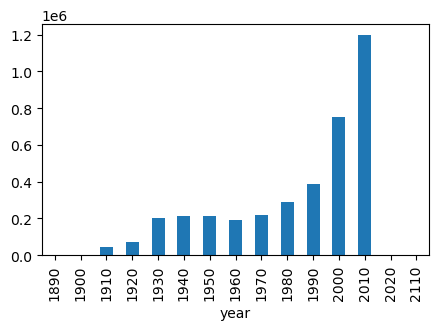

In [37]:
x = cast['year'].groupby((cast['year']//10)*10).count()
x.plot(kind='bar', figsize=(5, 3))

### Plot the number of "Hamlet" films made each decade.

<Axes: xlabel='year'>

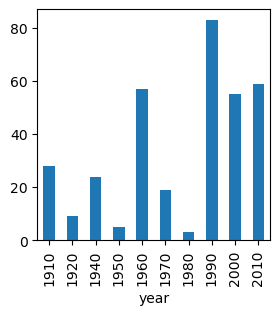

In [175]:
hamlet = cast.loc[cast['title']=='Hamlet']
x = hamlet['title'].groupby((hamlet['year']//10)*10).count()
x.plot(kind='bar', figsize=(3,3))


### Plot the number of "Rustler" characters in each decade of the history of film.

<Axes: xlabel='year'>

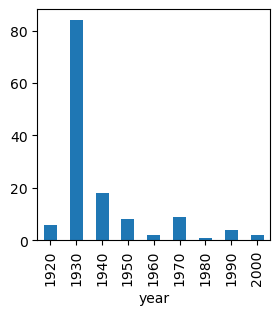

In [58]:
rustler = cast.loc[cast['character']=='Rustler']
x = rustler['character'].groupby((rustler['year']//10)*10).count()
x.plot(kind='bar',figsize=(3,3))

### Plot the number of "Hamlet" characters each decade.

<Axes: xlabel='year'>

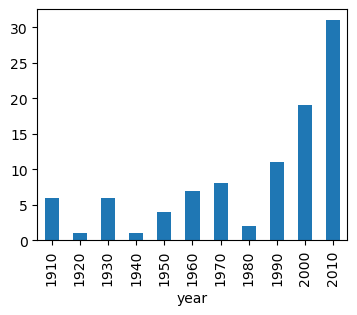

In [59]:
hamlet = cast.loc[cast['character']=='Hamlet']
x = hamlet['character'].groupby((hamlet['year']//10)*10).count()
x.plot(kind='bar', figsize=(4,3))

### What are the 11 most common character names in movie history?

In [64]:
char_count = cast['character'].groupby(cast['character']).count()
char_count.sort_values(ascending=False).head(11)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" In film history?

In [76]:
herself = cast.loc[cast['character']=='Herself']
c = herself['name'].groupby(herself['name']).count()
c.sort_values(ascending=False).head(10)

name
Queen Elizabeth II        12
Joyce Brothers             9
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Marta Berrocal             6
Oprah Winfrey              6
Marilyn Monroe             6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [77]:
himself = cast.loc[cast['character']=='Himself']
c = himself['name'].groupby(himself['name']).count()
c.sort_values(ascending=False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [91]:
act = cast.loc[cast['year']==1945]
a = act['name'].groupby(act['name']).count()
a.sort_values(ascending=False).head(1)

name
Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [94]:
act = cast.loc[cast['year']==1985]
a = act['name'].groupby(act['name']).count()
a.sort_values(ascending=False).head(1)

name
Mammootty    22
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<Axes: xlabel='year'>

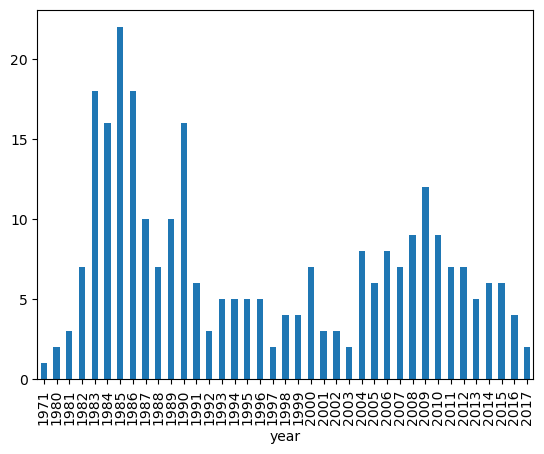

In [101]:
mamm = cast.loc[cast['name']=='Mammootty']
x= mamm['year'].groupby(mamm['year']).count()
x.plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [114]:
patron = cast.loc[cast['character'].str.startswith("Patron in")]
patron['character'].value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [119]:
science = cast.loc[cast['character'].str.startswith('Science')]
science['character'].value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science Club Member      5
Science Promo Cadet      5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

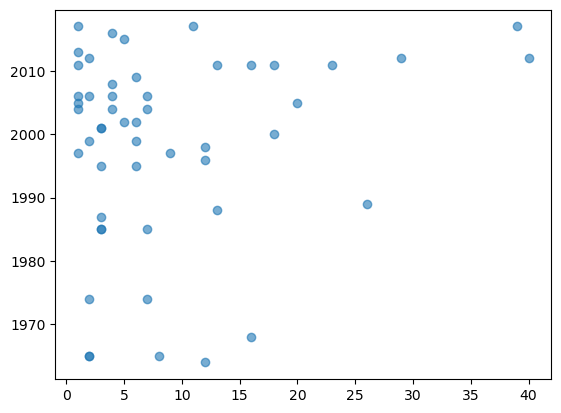

In [128]:
judi = cast.loc[cast['name']=='Judi Dench']
plt.scatter(judi['n'],judi['year'], alpha=0.6)

### Plot the n-values of Cary Grant's roles through his career.

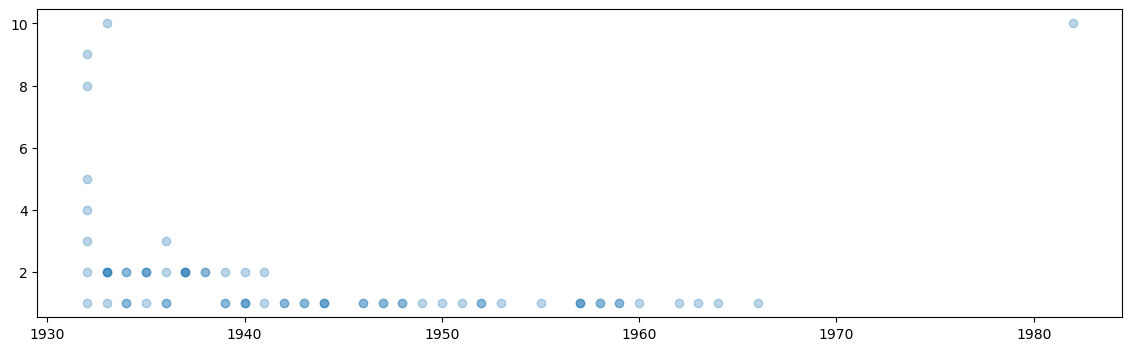

In [140]:
cary = cast.loc[cast['name']=='Cary Grant']
plt.figure(figsize=(14,4))
plt.scatter(cary['year'], cary['n'], alpha=0.3)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

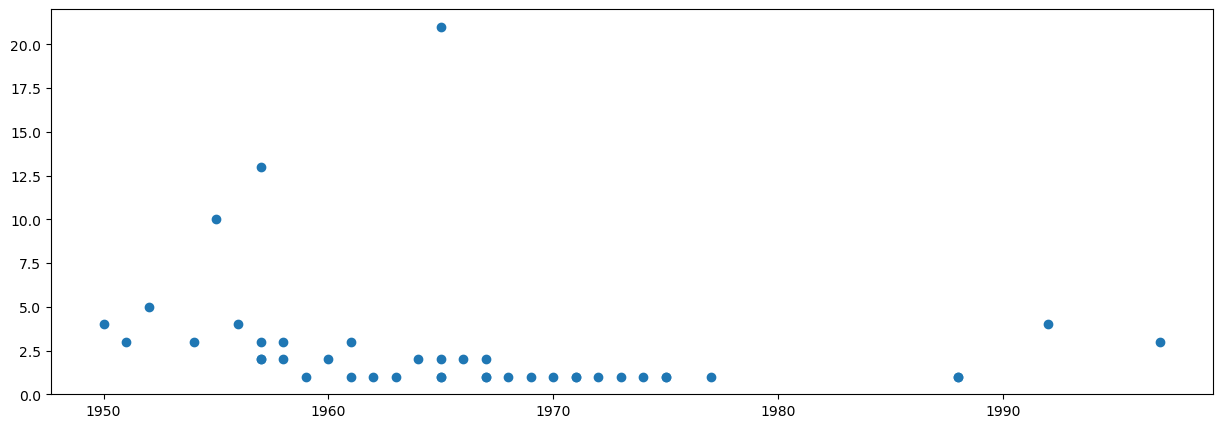

In [148]:
sid = cast.loc[cast['name']=='Sidney Poitier']
#sid["year"].groupby(sid['year']).count()
plt.figure(figsize=(15,5))
plt.scatter(sid['year'],sid['n'])

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [163]:
x = cast.loc[(cast['n']==1) & (cast['year']==1950)]
x['type'].groupby(x['type']).count()

type
actor      625
actress    288
Name: type, dtype: int64

### How many supporting roles (n=2) were available to actors and how many to actress in 1950s?

In [164]:
x = cast.loc[(cast['n']==2) & (cast['year']==1950)]
x['type'].groupby(x['type']).count()

type
actor      441
actress    414
Name: type, dtype: int64